# New Section

In [134]:
#PART 1

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [136]:
d = pd.read_csv('Part- 1 - Signal.csv')
d

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [138]:
d.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [139]:
d.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


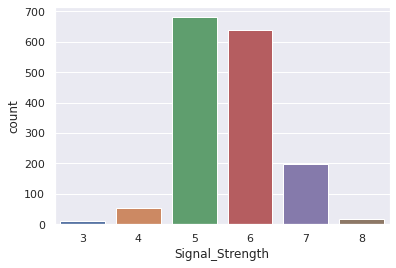

In [140]:
sns.countplot(d['Signal_Strength'])
#There are only 6 classes of signal strength, out of which class 5 is the most frequent

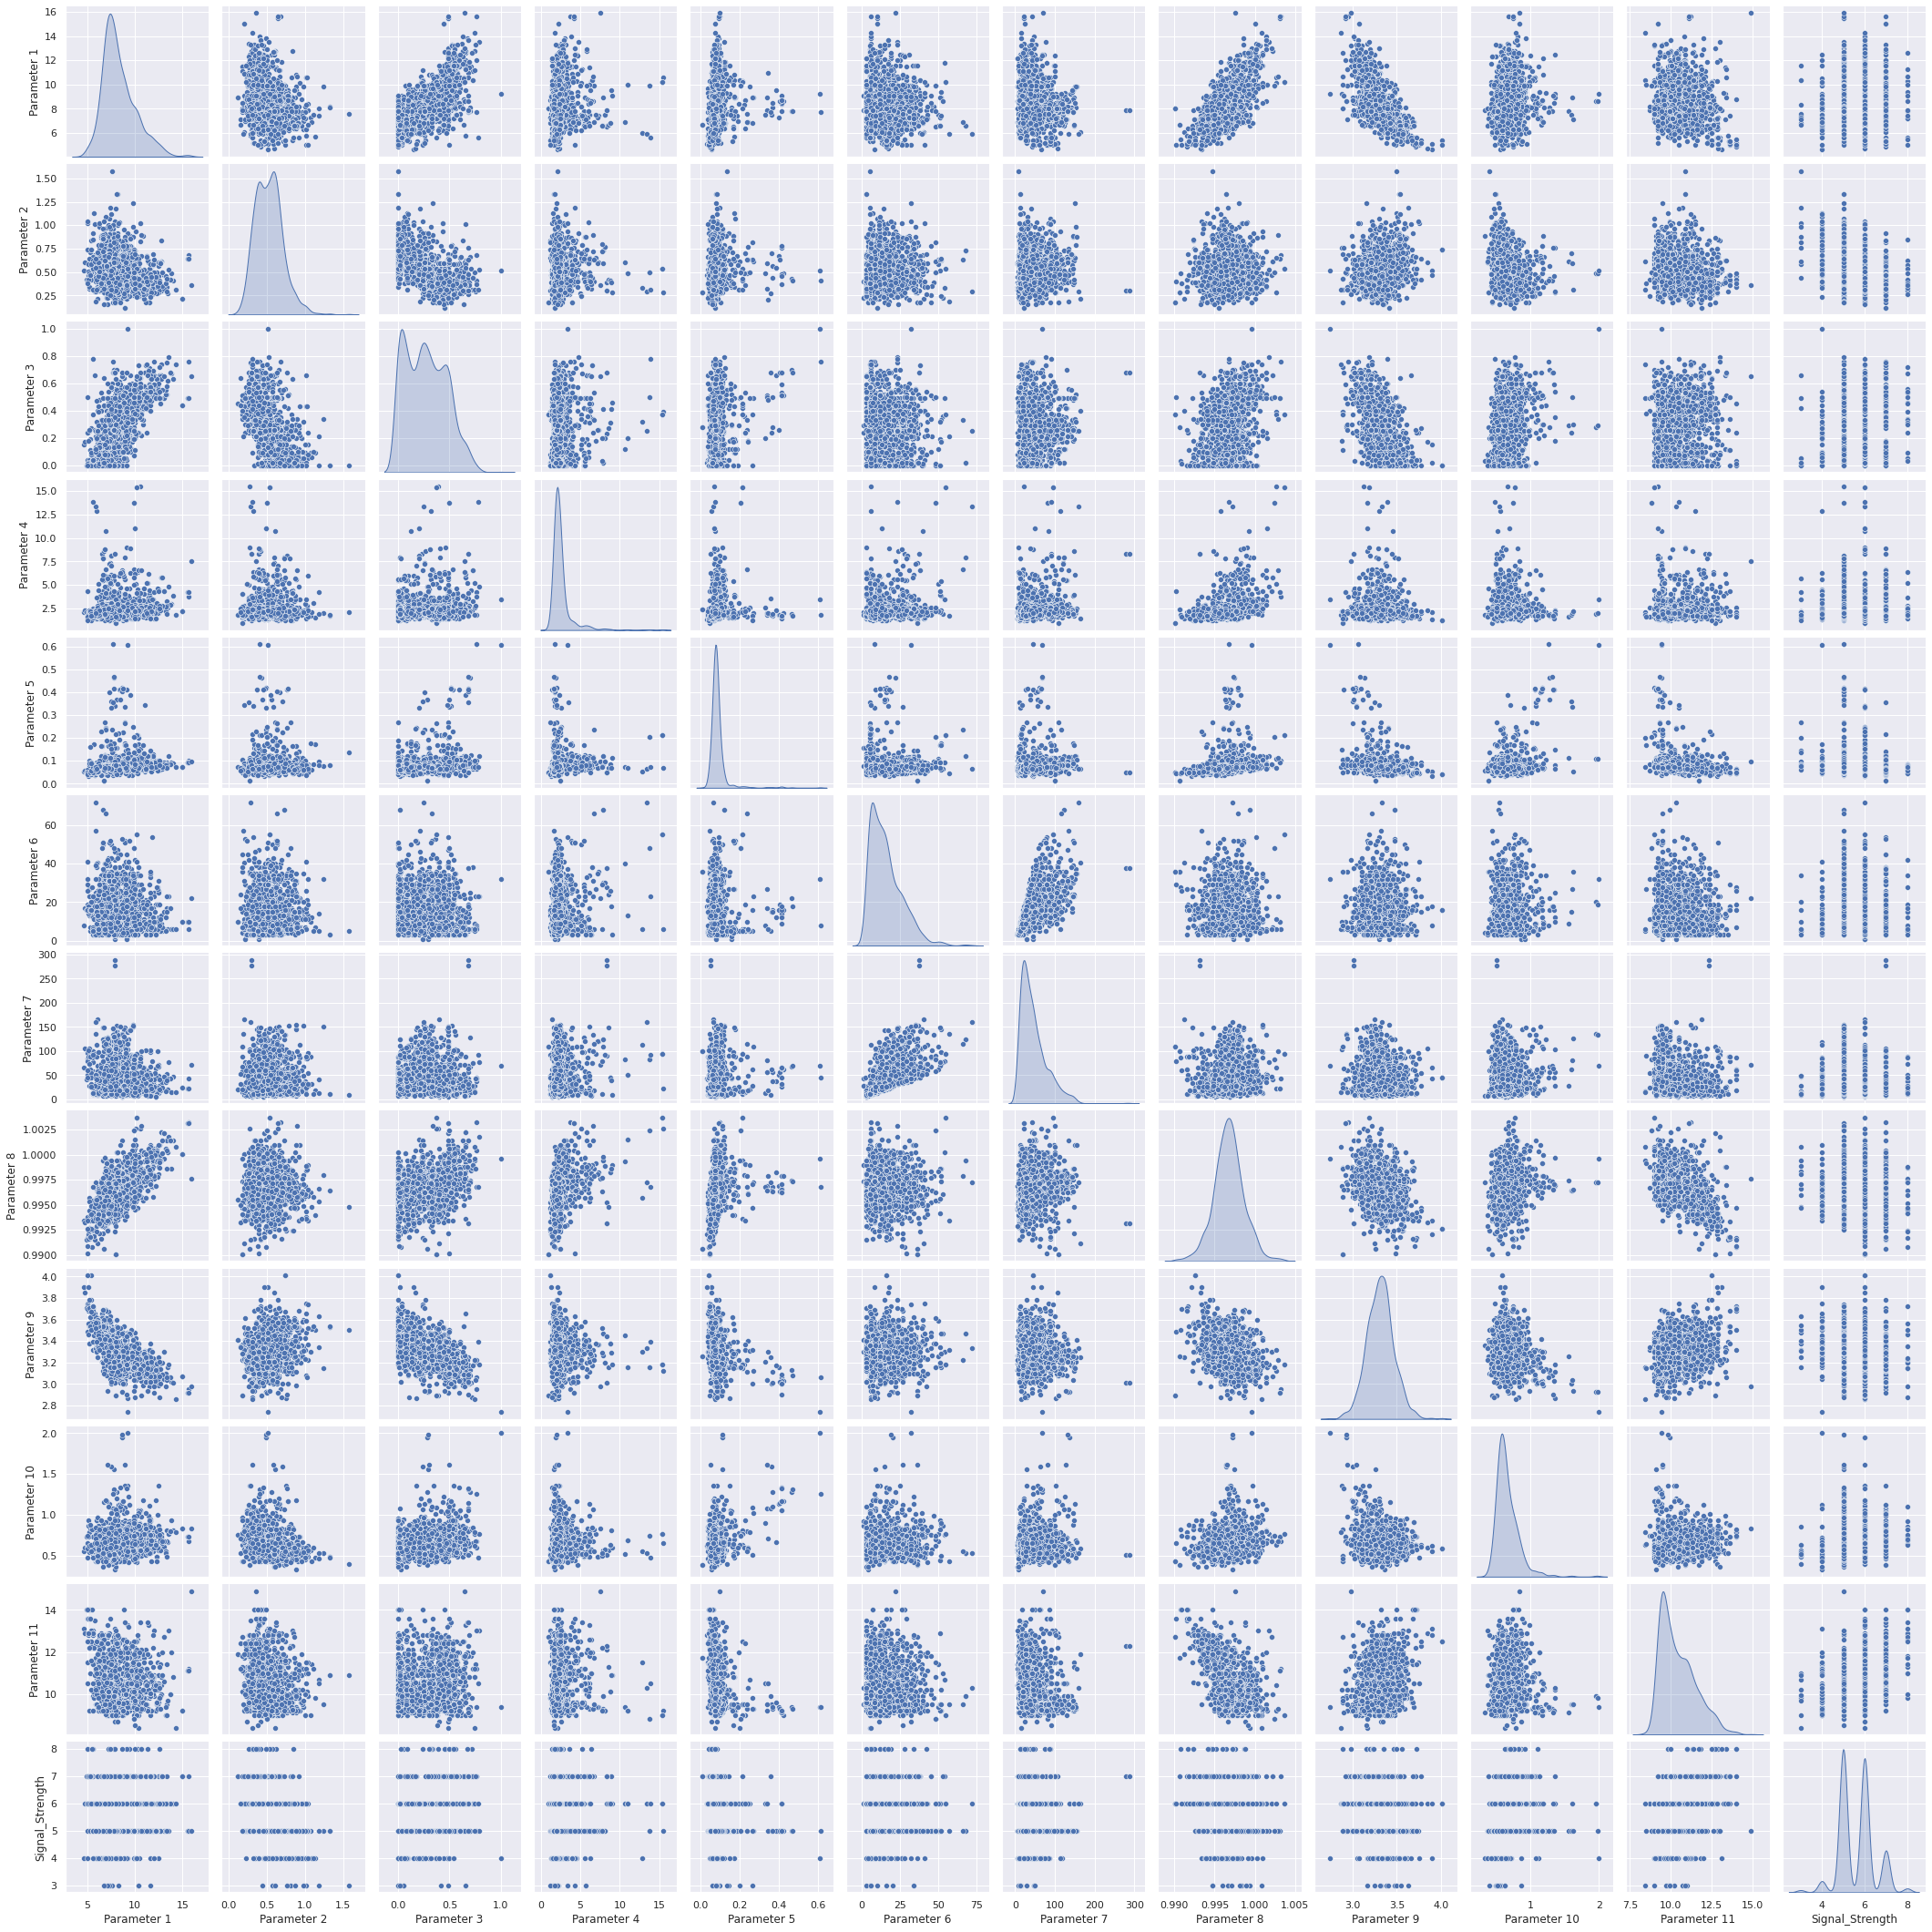

In [141]:
sns.pairplot(d,diag_kind='kde')

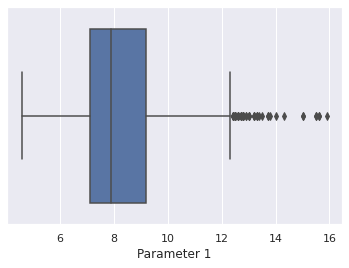

Parameter 1 :
Q1 :  7.1
Q2 :  7.9
Q3 :  9.2
IQR : 2.0999999999999996
Number of outliers are: 49


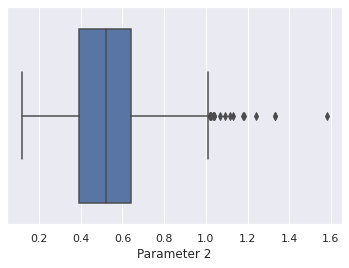

Parameter 2 :
Q1 :  0.39
Q2 :  0.52
Q3 :  0.64
IQR : 0.25
Number of outliers are: 19


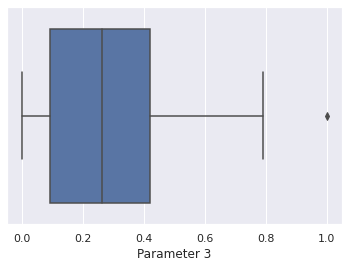

Parameter 3 :
Q1 :  0.09
Q2 :  0.26
Q3 :  0.42
IQR : 0.32999999999999996
Number of outliers are: 1


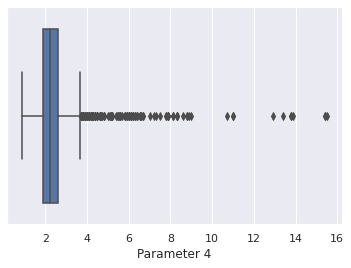

Parameter 4 :
Q1 :  1.9
Q2 :  2.2
Q3 :  2.6
IQR : 0.7000000000000002
Number of outliers are: 155


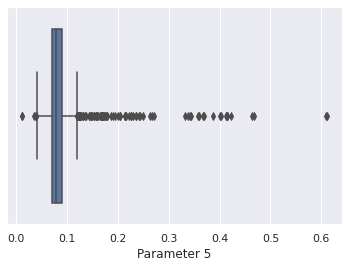

Parameter 5 :
Q1 :  0.07
Q2 :  0.079
Q3 :  0.09
IQR : 0.01999999999999999
Number of outliers are: 112


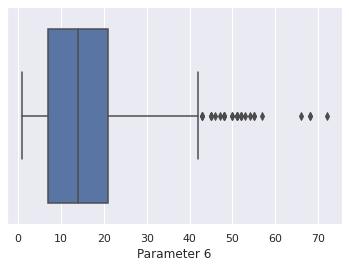

Parameter 6 :
Q1 :  7.0
Q2 :  14.0
Q3 :  21.0
IQR : 14.0
Number of outliers are: 30


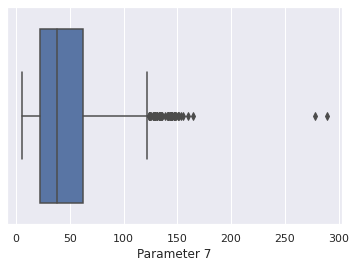

Parameter 7 :
Q1 :  22.0
Q2 :  38.0
Q3 :  62.0
IQR : 40.0
Number of outliers are: 55


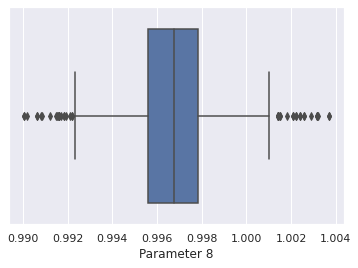

Parameter 8 :
Q1 :  0.9956
Q2 :  0.99675
Q3 :  0.9978349999999999
IQR : 0.002234999999999876
Number of outliers are: 45


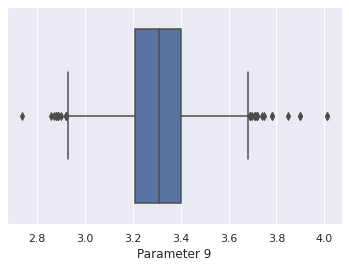

Parameter 9 :
Q1 :  3.21
Q2 :  3.31
Q3 :  3.4
IQR : 0.18999999999999995
Number of outliers are: 35


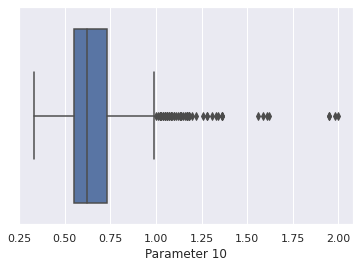

Parameter 10 :
Q1 :  0.55
Q2 :  0.62
Q3 :  0.73
IQR : 0.17999999999999994
Number of outliers are: 59


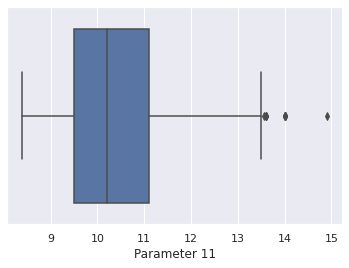

Parameter 11 :
Q1 :  9.5
Q2 :  10.2
Q3 :  11.1
IQR : 1.5999999999999996
Number of outliers are: 13


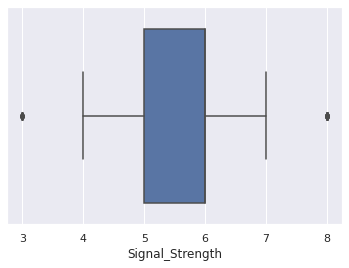

Signal_Strength :
Q1 :  5.0
Q2 :  6.0
Q3 :  6.0
IQR : 1.0
Number of outliers are: 28


In [142]:
l = len(d)
col = list(d.columns)
for i in np.arange(len(col)):
    sns.boxplot(x= d[col[i]])
    plt.show()
    print(col[i],':')
    Q1 = d[col[i]].quantile(0.25)
    Q2 = d[col[i]].quantile(0.50)
    Q3 = d[col[i]].quantile(0.75) 
    IQR = Q3 - Q1  
    print('Q1 : ',Q1)
    print('Q2 : ',Q2)
    print('Q3 : ',Q3)
    print('IQR :',IQR)
    out = (d[col[i]] < (Q1 - 1.5 *IQR)) |(d[col[i]] > (Q3 + 1.5 * IQR))
    print('Number of outliers are:',out.sum())

#Parameter 4 has highest outliers (155)

In [143]:
def treat(df,operation):
    cols=[]
    IQR_list=[]
    lower_list=[]
    upper_list=[]
    out_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_list.append(lower_boundary)
                upper_list.append(upper_boundary)
                out_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_list,upper_list,out_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [144]:
count,df=treat(d,'update')
if count>0:
    d=df

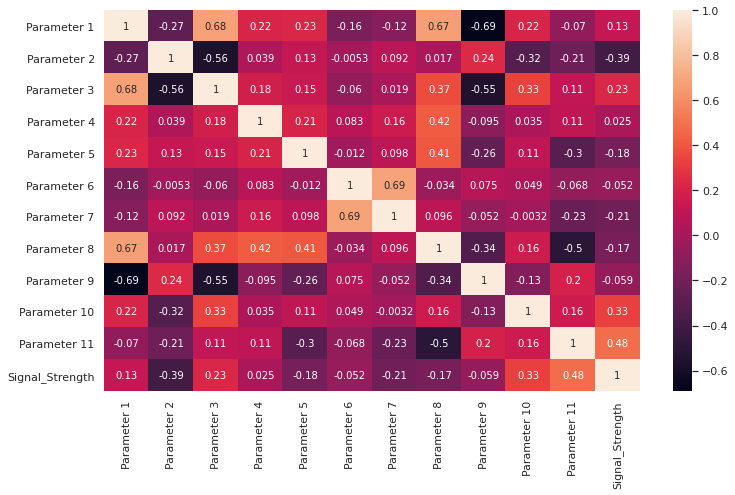

In [145]:
plt.subplots(figsize =(12, 7)) 
sns.heatmap(d.corr(),annot=True)
#Parameter 1 is highly correlated with Parameter 3, Parameter 8 and Parameter 9. Parameter 6 and 7 are highly correlated. 
#But since, the correlation is not too high near 0.8, the features need not be dropped.

In [146]:
X = d.drop("Signal_Strength", axis=1)
y = d['Signal_Strength']

In [147]:
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_vtrain.shape

(1119, 11)

In [148]:
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=1) #Splitting validation data from training data
X_train.shape

(895, 11)

In [149]:
model_reg = Sequential()
model_reg.add(BatchNormalization(input_shape=(11,)))
model_reg.add(Dense(1))

In [150]:
model_reg.compile(optimizer='sgd', loss='mse')

In [151]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=150, batch_size=10)

Epoch 1/150
90/90 [==============================] - 1s 3ms/step - loss: 3.9564 - val_loss: 10.0075
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6891 - val_loss: 1.5472
Epoch 3/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5408 - val_loss: 0.5828
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4863 - val_loss: 0.5966
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4580 - val_loss: 0.4456
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.4264
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4454 - val_loss: 0.4530
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4236 - val_loss: 0.4186
Epoch 9/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4450 - val_loss: 0.4547
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4308 - val_loss: 0.4265
Epoch 11

In [ ]:
#saving the model
model_reg.save("model_reg.h5")

In [ ]:
model_rr = load_model('model_reg.h5')

In [ ]:
y_pred = model_rr.predict(X_test)

In [ ]:
y_pred[:5] #Regressor

In [ ]:
y_test[:5]

In [157]:
print(r2_score(y_test,y_pred))

0.32184921186296


In [158]:
yc = to_categorical(y, num_classes=8)

In [159]:
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=1)

In [160]:
ycv_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [161]:
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=1)

In [162]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [163]:
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=150, validation_data=(Xc_val, yc_val))

Epoch 1/150
45/45 [==============================] - 1s 6ms/step - loss: 1.9681 - accuracy: 0.4201 - val_loss: 1.4948 - val_accuracy: 0.4196
Epoch 2/150
45/45 [==============================] - 0s 2ms/step - loss: 1.3022 - accuracy: 0.4682 - val_loss: 1.2154 - val_accuracy: 0.5000
Epoch 3/150
45/45 [==============================] - 0s 2ms/step - loss: 1.2011 - accuracy: 0.4782 - val_loss: 1.2272 - val_accuracy: 0.4330
Epoch 4/150
45/45 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4849 - val_loss: 1.1816 - val_accuracy: 0.4643
Epoch 5/150
45/45 [==============================] - 0s 2ms/step - loss: 1.1656 - accuracy: 0.4704 - val_loss: 1.1611 - val_accuracy: 0.4509
Epoch 6/150
45/45 [==============================] - 0s 2ms/step - loss: 1.1387 - accuracy: 0.4860 - val_loss: 1.1477 - val_accuracy: 0.4866
Epoch 7/150
45/45 [==============================] - 0s 2ms/step - loss: 1.1352 - accuracy: 0.4894 - val_loss: 1.1500 - val_accuracy: 0.4911
Epoch 8/150
4

In [ ]:
# save the model
model_class.save("model_class.h5")

In [ ]:
model_class.evaluate(Xc_train, yc_train, verbose=0)

In [ ]:
# score of test data
model_class.evaluate(Xc_test, yc_test, verbose=0)

In [167]:
model_class.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 96        
__________________________________

In [ ]:
#PART 2

In [ ]:
import io
import h5py
import requests 

url = 'https://drive.google.com/file/d/1PEXoZmxT1MH9AuatTG4JuuzjcCU0Q2oS/view'
r = requests.get(url, allow_redirects=True)

f= h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey.h5', 'w')
f.create_dataset(name ="Test", data = r.content)
f.close()

with open('Part - 4 - Autonomous_Vehicles_SVHN_single_grey.h5', 'wb') as f:
    f.write(r.content)

In [ ]:
from google.colab  import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NameError: ignored

In [108]:
!ls gdrive/MyDrive

'Colab Notebooks'				        Screencastify
'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5'


In [109]:
h5file=h5py.File('gdrive/MyDrive/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5',"r")
h5file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [110]:
# access the data in the hd5f file
X_test = h5file['X_test'][:]
X_train = h5file['X_train'][:]
X_val = h5file['X_val'][:]
y_test = h5file['y_test'][:]
y_train = h5file['y_train'][:]
y_val = h5file['y_val'][:]

h5file.close()  # close h5file

In [111]:
X_train.shape, X_val.shape, X_test.shape

((42000, 32, 32), (60000, 32, 32), (18000, 32, 32))

In [112]:
y_train.shape, y_val.shape, y_test.shape

((42000,), (60000,), (18000,))

In [113]:
print(X_train[0].shape)
X_train[0]

(32, 32)


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [114]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts() #Target distribution

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
dtype: int64

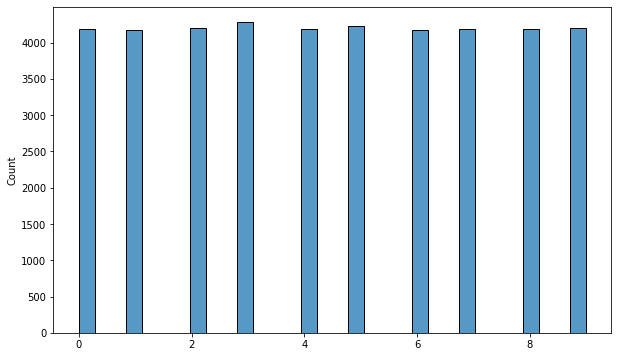

In [115]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(y_train_series)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64


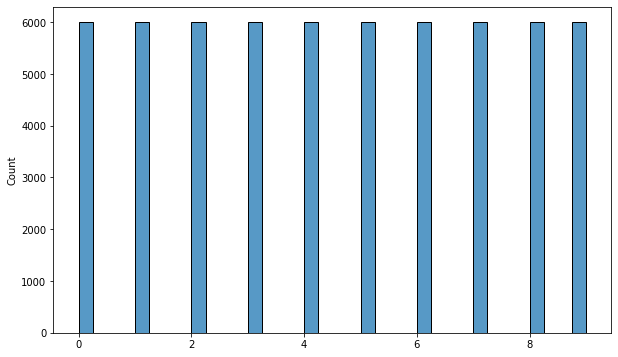

In [116]:
y_val_series = pd.Series(y_val)
print(y_val_series.value_counts())
fig = plt.figure(figsize=(10, 6))
sns.histplot(y_val_series)

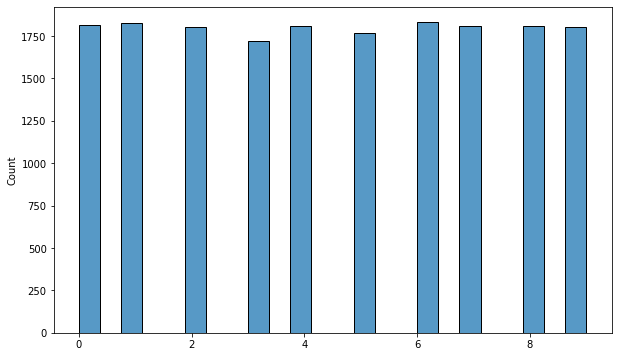

In [117]:
y_test_series = pd.Series(y_test)
y_test_series.value_counts()
fig = plt.figure(figsize=(10, 6))
sns.histplot(y_test_series)

The distributions are similar, hence there is no imbalance

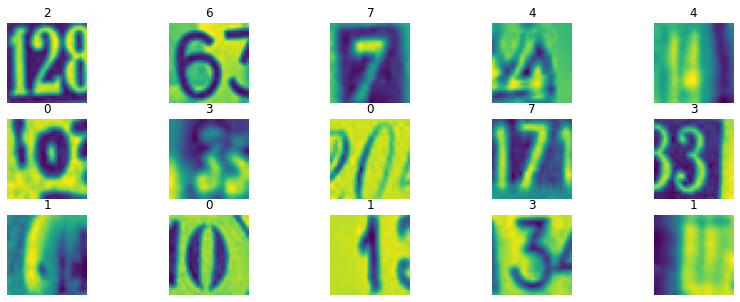

In [118]:
fig = plt.figure(figsize=(14, 5))
c = 5
r = 3
for i in range(1, c*r+1):
    img = X_train[i-1].reshape((32, 32))
    fig.add_subplot(r, c, i)
    plt.gca().set_title(y_train[i - 1])
    plt.gca().axis('off')
    plt.imshow(img)

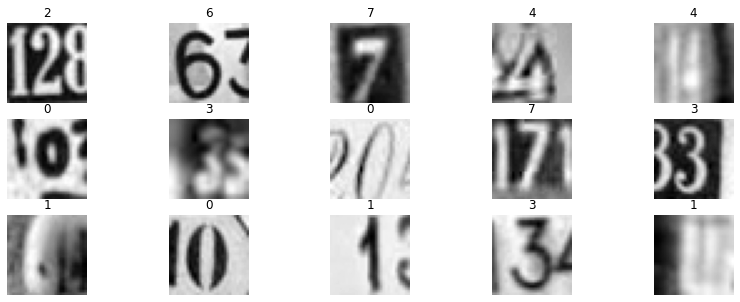

In [119]:
#Plotting same in grayscale
fig = plt.figure(figsize=(14, 5))
c = 5
r = 3
for i in range(1, c*r+1):
    img = X_train[i-1].reshape((32, 32))
    fig.add_subplot(r, c, i)
    plt.gca().set_title(y_train[i - 1])
    plt.gca().axis('off')
    plt.imshow(img, cmap="gray")
plt.show()

In [120]:
# reshape dataset to have a single channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1
print(width, height, channels)

X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
X_val = X_val.reshape((X_val.shape[0], width, height, channels))

32 32 1


In [121]:
X_train.shape, X_val.shape, X_test.shape

((42000, 32, 32, 1), (60000, 32, 32, 1), (18000, 32, 32, 1))

In [122]:
#Data augmentation:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tr_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.05,
    zoom_range=0.12,
    height_shift_range=0.02,
    width_shift_range=0.04,
    brightness_range=[0.1, 0.9]
    )

val_datagen = ImageDataGenerator()
tr_datagen.fit(X_train)
val_datagen.fit(X_val)

In [123]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [125]:
input_dim = X_train.shape[1]
num_classes = 10
learning_rate = 1e-4

adam = optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(128, input_dim=input_dim, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(num_classes),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [126]:
epochs = 200
batch_size = 2048

from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping

# To simplify the log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f} | Validation Acc: {l['val_accuracy']:.5f}", end =" >|> \n" ))

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=15,
                           verbose=1, 
                           restore_best_weights=True)

history = model.fit(tr_datagen.flow(X_train, y_train,
                                    batch_size=batch_size, 
                                    seed=1,
                                    shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    validation_data=(X_test, y_test),
                    callbacks = [early_stop, simple_log],
                    verbose=False)

 ~| Epoch: 1 | Validation Loss: 184.47581 | Validation Acc: 0.10189 >|> 
 ~| Epoch: 2 | Validation Loss: 161.90459 | Validation Acc: 0.09894 >|> 
 ~| Epoch: 3 | Validation Loss: 118.49176 | Validation Acc: 0.09972 >|> 
 ~| Epoch: 4 | Validation Loss: 96.31380 | Validation Acc: 0.12450 >|> 
 ~| Epoch: 5 | Validation Loss: 82.82366 | Validation Acc: 0.14222 >|> 
 ~| Epoch: 6 | Validation Loss: 70.59602 | Validation Acc: 0.14144 >|> 
 ~| Epoch: 7 | Validation Loss: 47.09531 | Validation Acc: 0.16933 >|> 
 ~| Epoch: 8 | Validation Loss: 48.00286 | Validation Acc: 0.17550 >|> 
 ~| Epoch: 9 | Validation Loss: 56.02437 | Validation Acc: 0.16306 >|> 
 ~| Epoch: 10 | Validation Loss: 59.25732 | Validation Acc: 0.17422 >|> 
 ~| Epoch: 11 | Validation Loss: 60.04133 | Validation Acc: 0.17861 >|> 
 ~| Epoch: 12 | Validation Loss: 51.32936 | Validation Acc: 0.19100 >|> 
 ~| Epoch: 13 | Validation Loss: 44.67207 | Validation Acc: 0.21461 >|> 
 ~| Epoch: 14 | Validation Loss: 42.30873 | Validation Ac

In [127]:
def plot_learning_curve(hist, metric='loss'):
    sns.set()
    plt.figure(figsize=(5, 4))
    train = hist.history[metric]
    val = hist.history[f'val_{metric}']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation')
    plt.title(f"{metric.capitalize()} vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [128]:
test_iterator = tr_datagen.flow(X_test, y_test, batch_size=batch_size)
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=1)
print('Test Accuracy: %.1f' % (acc * 100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


9/9 [==============================] - 8s 768ms/step - loss: 0.5962 - accuracy: 0.8192
Test Accuracy: 81.9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


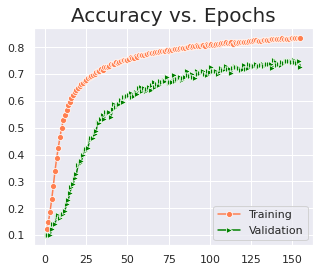

In [129]:
plot_learning_curve(history, metric='accuracy')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


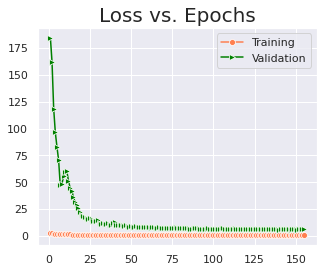

In [130]:
plot_learning_curve(history, metric='loss')

Text(57.5, 0.5, 'True Values')

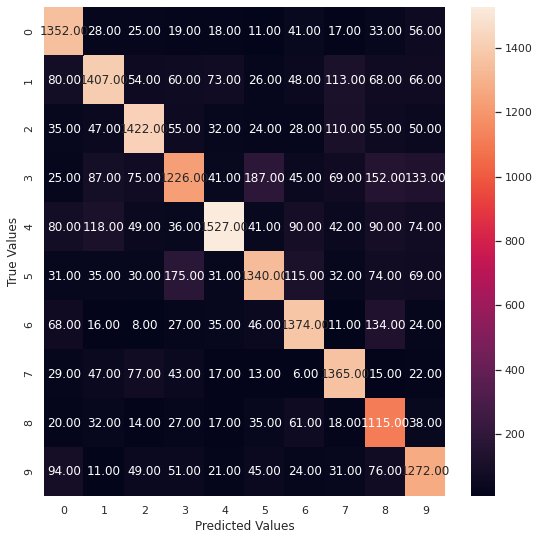

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig = plt.figure(figsize = (9, 9))

y_pred_bn = model.predict(X_test)

y_pred_bn = np.argmax(y_pred_bn, 1)
y_test_bn = np.argmax(y_test, 1)

conf = confusion_matrix(y_test_bn, y_pred_bn)

a = sns.heatmap(conf.T, annot=True, fmt='.2f', cmap=sns.color_palette("rocket", as_cmap = True))
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

i) We can see that the neural network model with a weight initializer has an accuracy of more than 70%.  
ii) From the classification matrix we can see that although the model predicts correctly for most of the digits, it also predicts some images incorrectly for digits like 0, 6 and 9 where the model isn't able to differentiate between 0 and the other digits and other cases like 6 & 8 and 1 & 7. Such cases might be handled by adding more data augmentation done for these digits specifically or creating an ensemble model.  
iii) From the plots between training loss and validation loss, we can see that the model was able to train well without much overfitting, evident from the two curves being close and an adequate test accuracy of 80% on a real-word dataset.